In [1]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
import random
import matplotlib
from matplotlib import pyplot as plt
import statistics
from pandas import DataFrame
from datetime import datetime
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Reshape, Flatten, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
#from keras import backend as K
import keras.backend.tensorflow_backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from keras.backend.tensorflow_backend import set_session
from os.path import basename
#import seaborn as sns
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy.stats import pearsonr

# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam




config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorf

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# 출처: https://3months.tistory.com/206 [Deep Play]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3796960298833113225
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8267812044
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1715303460958506626
physical_device_desc: "device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
workdir = "D://ResNetIC50//Dataset//MEDG-61K"

In [4]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]

dataset = np.load(workdir + "//MEDG61K_dataset.npz") # input file
ss0 = np.load(workdir + '//MEDG61K_dataset_nnnr0.npz') # split for training and test

In [5]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [6]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [7]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 29


In [8]:
x.shape

(61633, 42526)

In [9]:
training_image_array.shape

(55470, 42526)

In [10]:
# In[21]:

num_classes = 1
learning_rate = 0.0002
training_epochs = 150
batch_size = 100
img_rows, img_cols = 154, 154


In [11]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [12]:
shape_value = 40201
print(shape_value)

40201


In [13]:
train_X.shape

(55470, 42526)

In [14]:
train_X_cell = train_X[:,:shape_value]
train_X_drug =train_X[:,shape_value:]
test_X_cell = test_X[:,:shape_value]
test_X_drug = test_X[:,shape_value:]

In [15]:
train_X_cell.shape

(55470, 40201)

In [16]:
train_X_cell = train_X_cell.reshape(train_X_cell.shape[0], train_X_cell.shape[1], 1)
train_X_drug = train_X_drug.reshape(train_X_drug.shape[0], train_X_drug.shape[1], 1)
test_X_cell = test_X_cell.reshape(test_X_cell.shape[0], test_X_cell.shape[1], 1)
test_X_drug = test_X_drug.reshape(test_X_drug.shape[0], test_X_drug.shape[1], 1)
#input_shape = (img_rows, img_cols, 1)

In [17]:
print(train_X_cell.shape,train_X_drug.shape, train_y.shape, test_X_cell.shape,test_X_drug.shape, test_y.shape)

(55470, 40201, 1) (55470, 2325, 1) (55470,) (6163, 40201, 1) (6163, 2325, 1) (6163,)


In [18]:
train_X_cell.shape

(55470, 40201, 1)

In [19]:
train_X_cell = train_X_cell.astype('float32')
test_X_cell = test_X_cell.astype('float32')
train_X_drug = train_X_drug.astype('float32')
test_X_drug = test_X_drug.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (55470, 42526)
55470 train samples
6163 test samples


In [20]:
with K.tf.device('/GPU:0'):
    input_cell = Input(shape=(train_X_cell.shape[1], train_X_cell.shape[2]), name='cell_input')
    input_drug = Input(shape=(train_X_drug.shape[1], train_X_drug.shape[2]), name='drug_input')

    conv_cell_line_1 = Conv1D(filters=50, kernel_size=700, strides=5, activation='tanh')(input_cell)
    maxpool_cell_line_1 = MaxPooling1D(pool_size=5)(conv_cell_line_1)
    conv_cell_line_2 = Conv1D(filters=30, kernel_size=5, strides=2, activation='relu')(maxpool_cell_line_1)
    maxpool_cell_line_2 = MaxPooling1D(pool_size=10)(conv_cell_line_2)
    flatten_cell_line = Flatten()(maxpool_cell_line_2)
    dense_cell_line = Dense(100, activation='relu')(flatten_cell_line)
    dropout_cell_line = Dropout(0.1)(dense_cell_line)

    conv_drug_1 = Conv1D(filters=50, kernel_size=200, strides=3, activation='tanh')(input_drug)
    maxpool_drug_1 = MaxPooling1D(pool_size=5)(conv_drug_1)
    conv_drug_2 = Conv1D(filters=30, kernel_size=50, strides=5, activation='relu')(maxpool_drug_1)
    maxpool_drug_2 = MaxPooling1D(pool_size=10)(conv_drug_2)
    flatten_drug = Flatten()(maxpool_drug_2)
    dense_drug = Dense(100, activation='relu')(flatten_drug)
    dropout_drug = Dropout(0.1)(dense_drug)

    concatenate = Concatenate()([dropout_cell_line, dropout_drug])
    dense_1 = Dense(300, activation='tanh')(concatenate)
    dropout_1 = Dropout(0.1)(dense_1)
    reshape_1 = Reshape((300,1))(dropout_1)
    conv_1 = Conv1D(filters=30, kernel_size=150, strides=1, activation='relu')(reshape_1)
    maxpool_1 = MaxPooling1D(pool_size=2)(conv_1)
    conv_2 = Conv1D(filters=10, kernel_size=5, strides=1, activation='relu')(maxpool_1)
    maxpool_2 = MaxPooling1D(pool_size=3)(conv_2)
    conv_3 = Conv1D(filters=5, kernel_size=5, strides=1, activation='relu')(maxpool_2)
    maxpool_3 = MaxPooling1D(pool_size=3)(conv_3)
    dropout_2 = Dropout(0.1)(maxpool_3)
    flatten = Flatten()(dropout_2)
    dropout_3 = Dropout(0.2)(flatten)
    output = Dense(1, activation='linear', name='pred_lnIC50')(dropout_3)
    model = Model(inputs=[input_cell, input_drug], outputs=output, name='MasterModel')



In [21]:
model.summary()

Model: "MasterModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cell_input (InputLayer)         (None, 40201, 1)     0                                            
__________________________________________________________________________________________________
drug_input (InputLayer)         (None, 2325, 1)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 7901, 50)     35050       cell_input[0][0]                 
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 709, 50)      10050       drug_input[0][0]                 
________________________________________________________________________________________

In [22]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [23]:
optim = Adam(lr=0.0002)

model.compile(loss='mse',
		      optimizer=optim,
			  metrics=['mse','mae'])

StartTime8 = datetime.now()
print("StartTime :", StartTime8)
with K.tf.device('/GPU:0'):
    model_train = model.fit([train_X_cell, train_X_drug], train_y, validation_data=([test_X_cell, test_X_drug], test_y),
                            batch_size=batch_size,epochs=training_epochs,verbose=1)

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2022-02-16 14:48:49.745092

Train on 55470 samples, validate on 6163 samples
Epoch 1/150
55470/55470 [==============================] - 26s 466us/step - loss: 6.3077 - mse: 6.3077 - mae: 1.9614 - val_loss: 2.8257 - val_mse: 2.8257 - val_mae: 1.3170
Epoch 2/150
55470/55470 [==============================] - 22s 398us/step - loss: 2.6308 - mse: 2.6308 - mae: 1.2608 - val_loss: 1.9768 - val_mse: 1.9768 - val_mae: 1.0912
Epoch 3/150
55470/55470 [==============================] - 22s 396us/step - loss: 2.1233 - mse: 2.1233 - mae: 1.1247 - val_loss: 1.6706 - val_mse: 1.6706 - val_mae: 0.9620
Epoch 4/150
55470/55470 [==============================] - 22s 395us/step - loss: 2.0227 - mse: 2.0227 - mae: 1.0973 - val_loss: 1.6766 - val_mse: 1.6766 - val_mae: 0.9772
Epoch 5/150
55470/55470 [==============================] - 22s 397us/step - loss: 1.9713 - mse: 1.9713 - mae: 1.0798 - val_loss: 1.6958 - val_mse: 1.6958 - val_mae: 0.9744
Epoch 6/150
55470/55470 [==========================

55470/55470 [==============================] - 22s 404us/step - loss: 1.4011 - mse: 1.4011 - mae: 0.8984 - val_loss: 1.2792 - val_mse: 1.2792 - val_mae: 0.8385
Epoch 47/150
55470/55470 [==============================] - 22s 403us/step - loss: 1.3969 - mse: 1.3969 - mae: 0.8968 - val_loss: 1.2959 - val_mse: 1.2959 - val_mae: 0.8425
Epoch 48/150
55470/55470 [==============================] - 22s 403us/step - loss: 1.3972 - mse: 1.3972 - mae: 0.8975 - val_loss: 1.3402 - val_mse: 1.3402 - val_mae: 0.8796
Epoch 49/150
55470/55470 [==============================] - 22s 401us/step - loss: 1.3918 - mse: 1.3918 - mae: 0.8956 - val_loss: 1.3138 - val_mse: 1.3138 - val_mae: 0.8623
Epoch 50/150
55470/55470 [==============================] - 22s 405us/step - loss: 1.3801 - mse: 1.3801 - mae: 0.8921 - val_loss: 1.2869 - val_mse: 1.2869 - val_mae: 0.8480
Epoch 51/150
55470/55470 [==============================] - 22s 402us/step - loss: 1.3741 - mse: 1.3741 - mae: 0.8891 - val_loss: 1.2688 - val_mse: 

55470/55470 [==============================] - 22s 404us/step - loss: 1.1934 - mse: 1.1934 - mae: 0.8311 - val_loss: 1.1325 - val_mse: 1.1325 - val_mae: 0.7832
Epoch 94/150
55470/55470 [==============================] - 22s 403us/step - loss: 1.1855 - mse: 1.1855 - mae: 0.8246 - val_loss: 1.0878 - val_mse: 1.0878 - val_mae: 0.7700
Epoch 95/150
55470/55470 [==============================] - 23s 406us/step - loss: 1.1885 - mse: 1.1885 - mae: 0.8283 - val_loss: 1.1135 - val_mse: 1.1135 - val_mae: 0.7859
Epoch 96/150
55470/55470 [==============================] - 22s 404us/step - loss: 1.1826 - mse: 1.1826 - mae: 0.8261 - val_loss: 1.0845 - val_mse: 1.0845 - val_mae: 0.7697
Epoch 97/150
55470/55470 [==============================] - 22s 403us/step - loss: 1.1872 - mse: 1.1872 - mae: 0.8288 - val_loss: 1.0917 - val_mse: 1.0917 - val_mae: 0.7733
Epoch 98/150
55470/55470 [==============================] - 22s 403us/step - loss: 1.1707 - mse: 1.1707 - mae: 0.8232 - val_loss: 1.0783 - val_mse: 

55470/55470 [==============================] - 22s 401us/step - loss: 1.0863 - mse: 1.0863 - mae: 0.7925 - val_loss: 1.0495 - val_mse: 1.0495 - val_mae: 0.7556
Epoch 141/150
55470/55470 [==============================] - 22s 402us/step - loss: 1.0819 - mse: 1.0819 - mae: 0.7915 - val_loss: 1.0334 - val_mse: 1.0333 - val_mae: 0.7467
Epoch 142/150
55470/55470 [==============================] - 22s 404us/step - loss: 1.0843 - mse: 1.0843 - mae: 0.7935 - val_loss: 1.0336 - val_mse: 1.0336 - val_mae: 0.7560
Epoch 143/150
55470/55470 [==============================] - 22s 402us/step - loss: 1.0829 - mse: 1.0829 - mae: 0.7920 - val_loss: 1.0399 - val_mse: 1.0399 - val_mae: 0.7559
Epoch 144/150
55470/55470 [==============================] - 22s 399us/step - loss: 1.0841 - mse: 1.0841 - mae: 0.7910 - val_loss: 1.0459 - val_mse: 1.0459 - val_mae: 0.7544
Epoch 145/150
55470/55470 [==============================] - 22s 400us/step - loss: 1.0874 - mse: 1.0874 - mae: 0.7932 - val_loss: 1.0279 - val_

In [24]:
import json
from keras.models import model_from_json, load_model
workdir = "D://ResNetIC50//Result//MEDG-61K//CDRScan"
# Option 1: Save Weights + Architecture
model.save_weights(workdir+ '//MEDG61K_nnnr0_CDRScan_model_fix_v3.h5')
with open(workdir + '//MEDG61K_nnnr0_CDRScan_model_architecture_fix_v3.json', 'w') as f:
    f.write(model.to_json())
# Option 1: Load Weights + Architecture
# with open('model_architecture.json', 'r') as f:
#     new_model_1 = model_from_json(f.read())
# new_model_1.load_weights('model_weights.h5')

In [25]:
# Option 2: Save/Load the Entire Model
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save(workdir + '//MEDG61K_nnnr0_CDRScan_model_fix_2080ti_v3.h5')

# Deletes the existing model
# del model  

# Returns a compiled model identical to the previous one
# model = load_model('my_model.h5')

In [26]:
test_eval = model.evaluate([test_X_cell,test_X_drug], test_label_array, verbose=1)

6163/6163 [==============================] - 2s 276us/step


In [27]:
test_eval

[1.0200849943843422, 1.0200848579406738, 0.746387779712677]

In [28]:
accuracy = model_train.history['mse']
val_accuracy = model_train.history['val_mse']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

In [29]:
import matplotlib
from matplotlib import pyplot as plt

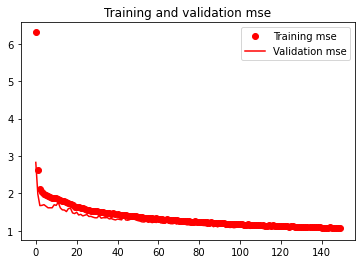

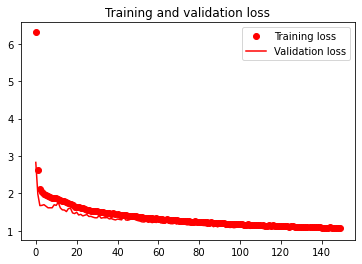

In [30]:
# accuracy = model_train.history['acc']
# val_accuracy = model_train.history['val_acc']
# loss = model_train.history['loss']
# val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse',c='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse',c='red')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss',c='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',c='red')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
predicted_classes = model.predict([test_X_cell,test_X_drug])

In [32]:
predicted_value = predicted_classes

In [33]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [34]:
c.to_csv(workdir + '//MEDG61K_nnnr0_CDRScan_pred_obs_table.csv')

In [35]:
c

,Predicted,Test
0,3.062489,4.019488
1,4.671288,4.874940
2,4.488622,3.469247
3,3.429545,3.188959
4,5.181105,5.234564
...,...,...
6158,4.102025,3.822629
6159,3.713385,5.123446
6160,3.879176,3.998526
6161,-2.016064,-1.653120


In [36]:
predicted_value.shape

(6163, 1)

In [37]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.8670682033746924, intercept=0.2540298136527781, rvalue=0.9340234114756447, pvalue=0.0, stderr=0.004224698155832275)

In [38]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.8723622595624119


In [39]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.0099925610891898


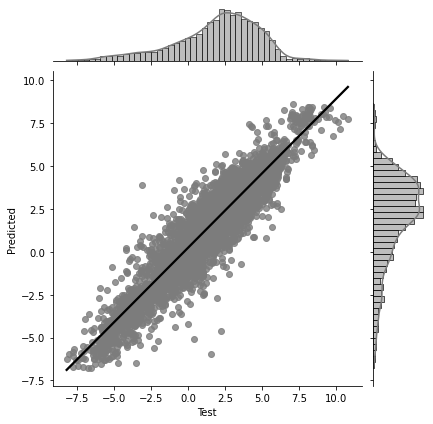

In [40]:
workdir = "D://ResNetIC50//Result//Figure//MEDG-61K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//MEDG61K_nnnr0_CDRScan.png', dpi=300)